In [1]:
import numpy as np
import os
import time
from resnet152 import ResNet152
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/newdata'
data_dir_list = os.listdir(data_path)

In [3]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-ripe

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [4]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(400, 1, 224, 224, 3)
(1, 400, 224, 224, 3)
(400, 224, 224, 3)


In [5]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:199]=0
labels[200:399]=1


names = ['ripe','unripe']

In [6]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [8]:
# Custom_resnet_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = ResNet152(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

custom_resnet_model.layers[-1].trainable

custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_zeropadding (ZeroPadding2 (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9408        conv1_zeropadding[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
scale_conv

__________________________________________________________________________________________________
res5b_branch2b_relu (Activation (None, 7, 7, 512)    0           scale5b_branch2b[0][0]           
__________________________________________________________________________________________________
res5b_branch2c (Conv2D)         (None, 7, 7, 2048)   1048576     res5b_branch2b_relu[0][0]        
__________________________________________________________________________________________________
bn5b_branch2c (BatchNormalizati (None, 7, 7, 2048)   8192        res5b_branch2c[0][0]             
__________________________________________________________________________________________________
scale5b_branch2c (Scale)        (None, 7, 7, 2048)   4096        bn5b_branch2c[0][0]              
__________________________________________________________________________________________________
res5b (Add)                     (None, 7, 7, 2048)   0           scale5b_branch2c[0][0]           
          

scale2b_branch2a (Scale)        (None, 56, 56, 64)   128         bn2b_branch2a[0][0]              
__________________________________________________________________________________________________
res2b_branch2a_relu (Activation (None, 56, 56, 64)   0           scale2b_branch2a[0][0]           
__________________________________________________________________________________________________
res2b_branch2b_zeropadding (Zer (None, 58, 58, 64)   0           res2b_branch2a_relu[0][0]        
__________________________________________________________________________________________________
res2b_branch2b (Conv2D)         (None, 56, 56, 64)   36864       res2b_branch2b_zeropadding[0][0] 
__________________________________________________________________________________________________
bn2b_branch2b (BatchNormalizati (None, 56, 56, 64)   256         res2b_branch2b[0][0]             
__________________________________________________________________________________________________
scale2b_br

__________________________________________________________________________________________________
scale5b_branch2b (Scale)        (None, 7, 7, 512)    1024        bn5b_branch2b[0][0]              
__________________________________________________________________________________________________
res5b_branch2b_relu (Activation (None, 7, 7, 512)    0           scale5b_branch2b[0][0]           
__________________________________________________________________________________________________
res5b_branch2c (Conv2D)         (None, 7, 7, 2048)   1048576     res5b_branch2b_relu[0][0]        
__________________________________________________________________________________________________
bn5b_branch2c (BatchNormalizati (None, 7, 7, 2048)   8192        res5b_branch2c[0][0]             
__________________________________________________________________________________________________
scale5b_branch2c (Scale)        (None, 7, 7, 2048)   4096        bn5b_branch2c[0][0]              
__________

320/320 [==============================] - 20s 64ms/step - loss: 0.1377 - acc: 0.9625 - val_loss: 2.7802 - val_acc: 0.6250
Epoch 23/100
320/320 [==============================] - 21s 65ms/step - loss: 0.1218 - acc: 0.9469 - val_loss: 1.6429 - val_acc: 0.7125
Epoch 24/100
320/320 [==============================] - 21s 65ms/step - loss: 0.0830 - acc: 0.9594 - val_loss: 0.8848 - val_acc: 0.7750
Epoch 25/100
320/320 [==============================] - 21s 64ms/step - loss: 0.1711 - acc: 0.9281 - val_loss: 1.2629 - val_acc: 0.7125
Epoch 26/100
320/320 [==============================] - 20s 64ms/step - loss: 0.1220 - acc: 0.9531 - val_loss: 1.6492 - val_acc: 0.7125
Epoch 27/100
320/320 [==============================] - 20s 64ms/step - loss: 0.0951 - acc: 0.9688 - val_loss: 0.7432 - val_acc: 0.8000
Epoch 28/100
320/320 [==============================] - 20s 64ms/step - loss: 0.0996 - acc: 0.9562 - val_loss: 0.6135 - val_acc: 0.8125
Epoch 29/100
320/320 [==============================] - 20s 6

320/320 [==============================] - 20s 64ms/step - loss: 0.0233 - acc: 0.9969 - val_loss: 1.1181 - val_acc: 0.7625
Epoch 83/100
320/320 [==============================] - 20s 63ms/step - loss: 0.0246 - acc: 0.9937 - val_loss: 1.5003 - val_acc: 0.7125
Epoch 84/100
320/320 [==============================] - 20s 63ms/step - loss: 0.0680 - acc: 0.9719 - val_loss: 0.9601 - val_acc: 0.7750
Epoch 85/100
320/320 [==============================] - 20s 63ms/step - loss: 0.0197 - acc: 0.9969 - val_loss: 0.4875 - val_acc: 0.8250
Epoch 86/100
320/320 [==============================] - 20s 63ms/step - loss: 0.0472 - acc: 0.9813 - val_loss: 1.4282 - val_acc: 0.7125
Epoch 87/100
320/320 [==============================] - 20s 64ms/step - loss: 0.0409 - acc: 0.9781 - val_loss: 1.6895 - val_acc: 0.7125
Epoch 88/100
320/320 [==============================] - 20s 63ms/step - loss: 0.0609 - acc: 0.9781 - val_loss: 1.6763 - val_acc: 0.7125
Epoch 89/100
320/320 [==============================] - 20s 6

In [10]:
custom_resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_zeropadding (ZeroPadding2 (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9408        conv1_zeropadding[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
scale_conv

                                                                 res4b29_relu[0][0]               
__________________________________________________________________________________________________
res4b30_relu (Activation)       (None, 14, 14, 1024) 0           res4b30[0][0]                    
__________________________________________________________________________________________________
res4b31_branch2a (Conv2D)       (None, 14, 14, 256)  262144      res4b30_relu[0][0]               
__________________________________________________________________________________________________
bn4b31_branch2a (BatchNormaliza (None, 14, 14, 256)  1024        res4b31_branch2a[0][0]           
__________________________________________________________________________________________________
scale4b31_branch2a (Scale)      (None, 14, 14, 256)  512         bn4b31_branch2a[0][0]            
__________________________________________________________________________________________________
res4b31_br

In [11]:
model.save('ripe_unripe_Resnet152.model')

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(100)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

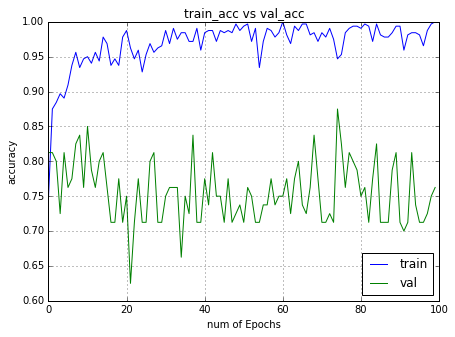

In [13]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])